<a href="https://colab.research.google.com/github/fanyrodz/FinDataX/blob/main/FinDataX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

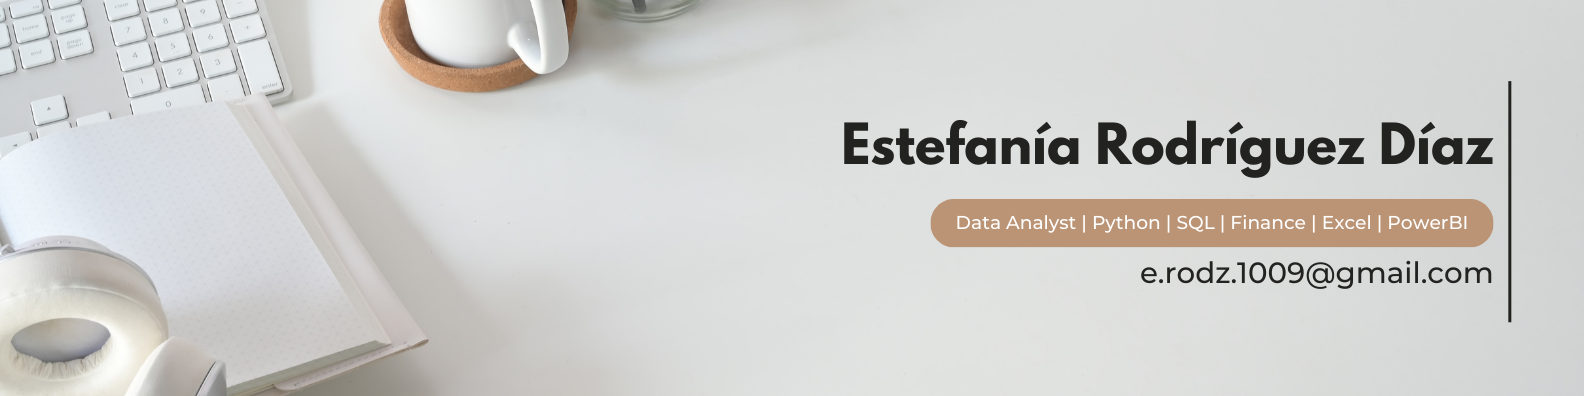

## 1. FILE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/FinDataX.csv')

## 2. DATA PREPARATION


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   customer_id            1000 non-null   int64 
 1   first_name             1000 non-null   object
 2   last_name              1000 non-null   object
 3   age                    1000 non-null   int64 
 4   gender                 1000 non-null   object
 5   signup_date            1000 non-null   object
 6   income                 1000 non-null   int64 
 7   city                   1000 non-null   object
 8   transactions_last_3m   1000 non-null   int64 
 9   avg_balance            1000 non-null   int64 
 10  app_logins_last_month  1000 non-null   int64 
 11  late_payments          1000 non-null   int64 
 12  support_tickets        1000 non-null   int64 
 13  credit_score           1000 non-null   int64 
 14  device_type            1000 non-null   object
 15  churn                 

In [4]:
print(df.duplicated().sum())

0


With this we confirm that:
- There are no null values in the dataset
- There are no duplicate values
- And all the data have the right type

So we can move forward to the analysis

## 4. ANALYSIS

In [5]:
service_canceled =df['churn'].value_counts()
print(service_canceled)

churn
1    712
0    288
Name: count, dtype: int64


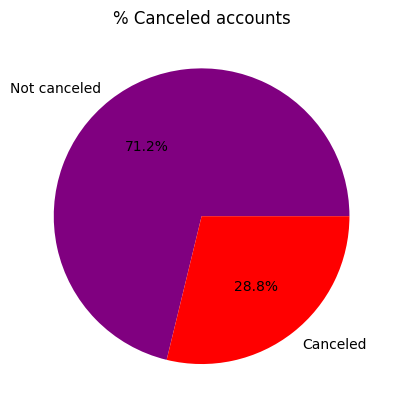

In [6]:
plt.pie(service_canceled,
        labels=['Not canceled','Canceled'],
        autopct='%1.1f%%',
        colors=['purple','red'])
plt.title('% Canceled accounts')
plt.show()


With this chart we can see that 28.8% of the customers in the dataset had canceled the subscription

### Support tickets

In [7]:
canceled_with_ticket =df.loc[df['churn'] == 1, 'support_tickets'].mean()
print(f'Average tickets of customers that canceled:{canceled_with_ticket:.2f}')

Average tickets of customers that canceled:7.47


In [8]:
not_canceled_with_ticket =df.loc[df['churn'] == 0, 'support_tickets'].mean()
print(f'Average tickets of customers that did not canceled:{not_canceled_with_ticket:.2f}')

Average tickets of customers that did not canceled:7.16


We can see that the average support tickets that the customers that canceled their account opened are similar to the ones that haven't canceled yet, so we can say that that's probably not a reazon for they to cancel their account.

### Income

In [9]:
canceled_income =df.loc[df['churn']==1, 'income'].mean()
print(f'Average income of customers that canceled {canceled_income:.2f}')

not_canceled_income =df.loc[df['churn']==0, 'income'].mean()
print(f"Average income of customers that haven't canceled {not_canceled_income:.2f}")

Average income of customers that canceled 81768.68
Average income of customers that haven't canceled 83011.19


churn
0    83011.194444
1    81768.681180
Name: income, dtype: float64


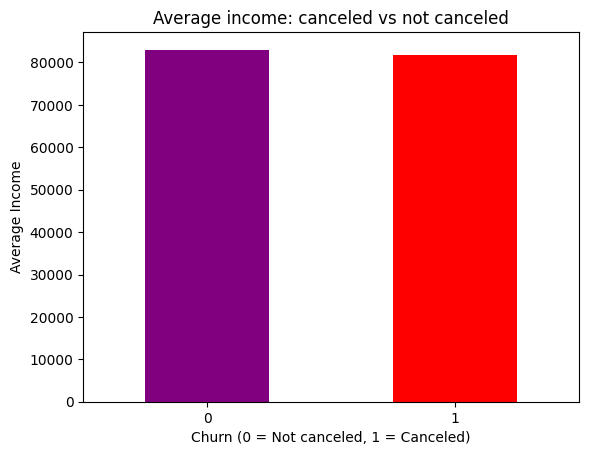

In [10]:

average = df.groupby('churn')['income'].mean()
print(average)

average.plot(kind='bar', color=['purple', 'red'])
plt.title('Average income: canceled vs not canceled')
plt.xlabel('Churn (0 = Not canceled, 1 = Canceled)')
plt.ylabel('Average Income')
plt.xticks(rotation=0)
plt.show()


### Late Payments

In [11]:
canceled_late_payments =df.loc[df['churn']==1, 'late_payments'].mean()
print(f'Average late payments of customers that canceled {canceled_late_payments:.2f}')


not_canceled_late_payments =df.loc[df['churn']==0, 'late_payments'].mean()
print(f"Average late payments of customers that haven't canceled {not_canceled_late_payments:.2f}")

Average late payments of customers that canceled 7.49
Average late payments of customers that haven't canceled 2.10


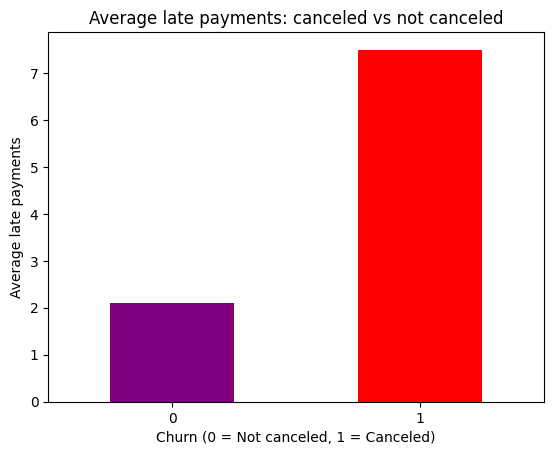

In [12]:
average_late_payments = df.groupby('churn')['late_payments'].mean()
average_late_payments.plot(
    kind='bar',
    color=['purple','red']
)
plt.title('Average late payments: canceled vs not canceled')
plt.xlabel('Churn (0 = Not canceled, 1 = Canceled)')
plt.ylabel('Average late payments')
plt.xticks(rotation=0)
plt.show()

As we can see in this chart, customers who canceled have an average of 7.49 late payments, which gives us an idea of why they might have canceled—possibly due to financial problems.

### Credit Score

In [13]:
canceled_credit_score =df.loc[df['churn']==1, 'credit_score'].mean()
print(f'Average credit score of customers that canceled {canceled_credit_score:.2f}')


not_canceled_credit_score =df.loc[df['churn']==0, 'credit_score'].mean()
print(f"Average credit score of customers that haven't canceled {not_canceled_credit_score:.2f}")

Average credit score of customers that canceled 579.06
Average credit score of customers that haven't canceled 582.66


### App logins last month

In [14]:
canceled_app_logins_last_month =df.loc[df['churn']==1, 'app_logins_last_month'].mean()
print(f'Average app logins last month of customers that canceled {canceled_app_logins_last_month:.2f}')


not_canceled_app_logins_last_month =df.loc[df['churn']==0, 'app_logins_last_month'].mean()
print(f"Average apps logins last month of customers that haven't canceled {not_canceled_app_logins_last_month:.2f}")

Average app logins last month of customers that canceled 45.29
Average apps logins last month of customers that haven't canceled 45.94


### Average Balance

In [15]:
canceled_avg_balance =df.loc[df['churn']==1, 'avg_balance'].mean()
print(f'Average balance of customers that canceled {canceled_avg_balance:.2f}')


not_canceled_avg_balance =df.loc[df['churn']==0, 'avg_balance'].mean()
print(f"Average balance of customers that haven't canceled {not_canceled_avg_balance:.2f}")

Average balance of customers that canceled 24234.22
Average balance of customers that haven't canceled 23442.46


### Transactions last 3 months


In [16]:
canceled_transactions_last_3m =df.loc[df['churn']==1, 'transactions_last_3m'].mean()
print(f'Average transactions_last_3m of customers that canceled {canceled_transactions_last_3m:.2f}')


not_canceled_transactions_last_3m =df.loc[df['churn']==0, 'transactions_last_3m'].mean()
print(f"Average transactions_last_3m of customers that haven't canceled {not_canceled_transactions_last_3m:.2f}")

Average transactions_last_3m of customers that canceled 56.51
Average transactions_last_3m of customers that haven't canceled 63.18


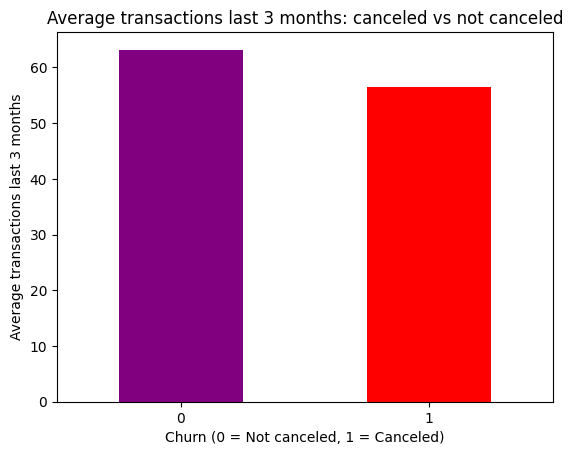

In [17]:
average_transactions_last_3m = df.groupby('churn')['transactions_last_3m'].mean()
average_transactions_last_3m.plot(
    kind='bar',
    color=['purple','red']
)
plt.title('Average transactions last 3 months: canceled vs not canceled')
plt.xlabel('Churn (0 = Not canceled, 1 = Canceled)')
plt.ylabel('Average transactions last 3 months')
plt.xticks(rotation=0)
plt.show()

## 4. CONFIRM CORRELATION

In [20]:
corr_matrix = df.corr(numeric_only=True)   # numeric_only evita problemas con columnas de texto
print(corr_matrix['churn'].sort_values(ascending=False))

churn                    1.000000
late_payments            0.664759
support_tickets          0.031522
avg_balance              0.024521
credit_score            -0.010194
app_logins_last_month   -0.011142
customer_id             -0.011368
income                  -0.014685
age                     -0.036368
transactions_last_3m    -0.087393
Name: churn, dtype: float64


In [21]:
!pip install seaborn

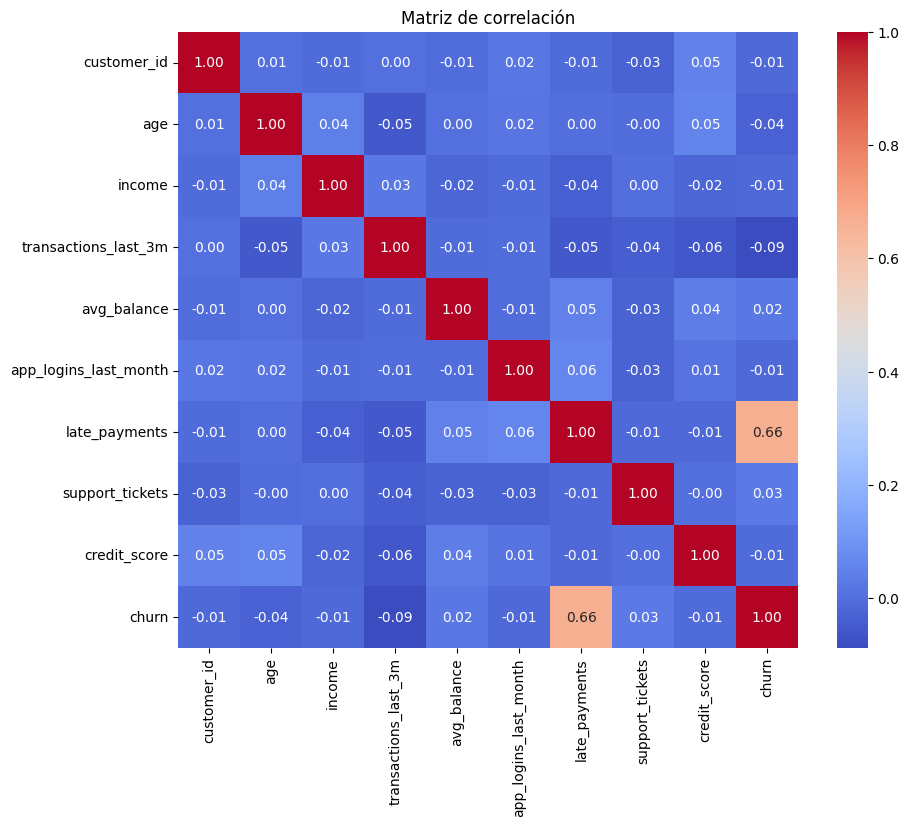

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


We can see in this table that the only variable with a strong correlation to service cancellation is late_payments